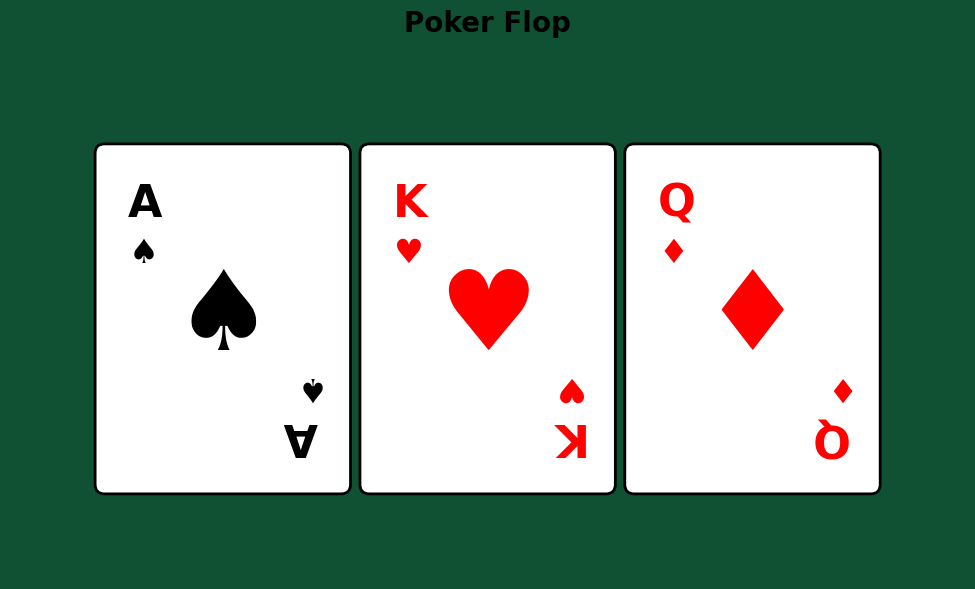

In [3]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import random

def draw_card(ax, x, y, width, height, rank, suit):
    """Draw a playing card at the specified position"""
    
    # Card background (white rounded rectangle with black border)
    card_rect = patches.FancyBboxPatch((x, y), width, height,
                                     boxstyle="round,pad=0.1",
                                     linewidth=2, edgecolor='black', 
                                     facecolor='white', zorder=1)
    ax.add_patch(card_rect)
    
    # Suit symbols and colors
    suit_symbols = {'♠': '♠', '♣': '♣', '♥': '♥', '♦': '♦'}
    suit_colors = {'♠': 'black', '♣': 'black', '♥': 'red', '♦': 'red'}
    
    symbol = suit_symbols[suit]
    color = suit_colors[suit]
    
    # Rank in top-left corner
    ax.text(x + width*0.1, y + height*0.85, rank, 
            fontsize=32, fontweight='bold', color=color,
            ha='left', va='center', zorder=2)
    
    # Small suit symbol next to rank
    ax.text(x + width*0.1, y + height*0.7, symbol, 
            fontsize=24, color=color,
            ha='left', va='center', zorder=2)
    
    # Large suit symbol in center
    ax.text(x + width*0.5, y + height*0.5, symbol, 
            fontsize=80, color=color,
            ha='center', va='center', zorder=2)
    
    # Rank in bottom-right corner (upside down)
    ax.text(x + width*0.9, y + height*0.15, rank, 
            fontsize=32, fontweight='bold', color=color,
            ha='right', va='center', rotation=180, zorder=2)
    
    # Small suit symbol next to bottom rank (upside down)
    ax.text(x + width*0.9, y + height*0.3, symbol, 
            fontsize=24, color=color,
            ha='right', va='center', rotation=180, zorder=2)

def display_flop():
    """Display three cards representing a poker flop"""
    
    # Example flop: Ace of Spades, King of Hearts, Queen of Diamonds
    flop_cards = [
        ('A', '♠'),
        ('K', '♥'), 
        ('Q', '♦')
    ]
    
    # Create figure and axis
    fig, ax = plt.subplots(1, 1, figsize=(12, 6))
    
    # Card dimensions
    card_width = 2.5
    card_height = 3.5
    card_spacing = 0.3
    
    # Starting position (centered)
    start_x = 1
    start_y = 1
    
    # Draw the three flop cards
    for i, (rank, suit) in enumerate(flop_cards):
        x_pos = start_x + i * (card_width + card_spacing)
        draw_card(ax, x_pos, start_y, card_width, card_height, rank, suit)
    
    # Set axis properties
    ax.set_xlim(0, start_x + 3 * card_width + 2 * card_spacing + 1)
    ax.set_ylim(0, start_y + card_height + 1)
    ax.set_aspect('equal')
    ax.axis('off')  # Hide axes
    
    # Add title
    plt.title('Poker Flop', fontsize=20, fontweight='bold', pad=20)
    
    # Add some felt-like background color
    fig.patch.set_facecolor('#0F5132')  # Dark green like poker table
    
    plt.tight_layout()
    plt.show()

# Display the flop
display_flop()

In [ ]:
import random



ranks = ['2', '3', '4', '5', '6', '7', '8', '9', '10', 'J', 'Q', 'K', 'A']
suits = ['C', 'H', 'S', 'D']
suits_symbols = {'C': '♣', 'H': '♥', 'S': '♠', 'D': '♦'}
deck = [Card(rank, suit) for rank in ranks for suit in suits]
def shuffle_deck(deck):
    """Shuffle the deck of cards"""
    random.shuffle(deck)
    return deck

print([str(card) for card in shuffle_deck(deck)])


['J♣', 'J♦', '2♠', '9♣', '8♦', '6♦', '8♣', '7♥', '10♥', '10♠', '7♦', 'Q♠', 'A♠', '9♦', 'Q♦', '3♣', 'K♠', '8♠', '2♣', '5♥', '10♦', '3♥', '5♣', '4♠', 'Q♣', '7♣', 'Q♥', 'K♣', '9♠', '6♥', '5♠', '2♥', '8♥', 'A♥', '2♦', '10♣', '6♠', 'J♥', 'K♦', '3♠', '4♥', '6♣', '4♣', '5♦', '9♥', 'J♠', '3♦', 'A♣', '4♦', 'A♦', 'K♥', '7♠']


In [10]:
class Card:
    def __init__(self, rank: str, suit: str):
        self.rank = rank
        self.suit = suit
    
    def __repr__(self):
        return f"Card(rank='{self.rank}', suit='{self.suit}')"
    
    def __str__(self):
        suit_symbols = {'C': '♣', 'H': '♥', 'S': '♠', 'D': '♦'}
        return f"{self.rank}{suit_symbols[self.suit]}"
    
    def __eq__(self, other):
        if not isinstance(other, Card):
            return False
        return self.rank == other.rank and self.suit == other.suit
    
    def to_html(self):
        """Return HTML representation of the card with proper colors"""
        suit_symbols = {'C': '♣', 'H': '♥', 'S': '♠', 'D': '♦'}
        suit_colors = {'C': 'black', 'H': 'red', 'S': 'black', 'D': 'red'}
        
        symbol = suit_symbols[self.suit]
        color = suit_colors[self.suit]
        
        return f'<span style="color: {color}; font-weight: bold; font-size: 14px; border: 1px solid #ccc; padding: 2px 4px; margin: 1px; background: white; border-radius: 3px;">{self.rank}{symbol}</span>'

class Deck:
    """A deck of playing cards for poker"""
    
    def __init__(self):
        """Initialize a standard 52-card deck"""
        self.ranks = ['2', '3', '4', '5', '6', '7', '8', '9', '10', 'J', 'Q', 'K', 'A']
        self.suits = ['C', 'H', 'S', 'D']  # Clubs, Hearts, Spades, Diamonds
        self.reset()
    
    def reset(self):
        """Reset the deck to a full 52-card deck"""
        self.cards = [Card(rank, suit) for rank in self.ranks for suit in self.suits]
        self.dealt_cards = []
    
    def shuffle(self):
        """Shuffle the deck"""
        random.shuffle(self.cards)
        return self
    
    def deal_card(self):
        """Deal one card from the top of the deck"""
        if not self.cards:
            raise ValueError("Cannot deal from an empty deck!")
        
        card = self.cards.pop()
        self.dealt_cards.append(card)
        return card
    
    def deal_hand(self, num_cards=2):
        """Deal a hand of cards (default 2 for poker)"""
        return [self.deal_card() for _ in range(num_cards)]
    
    def deal_flop(self):
        """Deal the flop (3 cards) - burns one card first"""
        self.burn_card()  # Burn a card before the flop
        return [self.deal_card() for _ in range(3)]
    
    def deal_turn(self):
        """Deal the turn (1 card) - burns one card first"""
        self.burn_card()  # Burn a card before the turn
        return self.deal_card()
    
    def deal_river(self):
        """Deal the river (1 card) - burns one card first"""
        self.burn_card()  # Burn a card before the river
        return self.deal_card()
    
    def burn_card(self):
        """Burn (discard) the top card - standard in poker"""
        if self.cards:
            burned = self.cards.pop()
            self.dealt_cards.append(burned)
            return burned
        return None
    
    def cards_remaining(self):
        """Return number of cards remaining in deck"""
        return len(self.cards)
    
    def peek_top(self, num=1):
        """Peek at the top card(s) without dealing them"""
        if num > len(self.cards):
            return self.cards[-len(self.cards):]
        return self.cards[-num:]
    
    def __len__(self):
        """Return number of cards in deck"""
        return len(self.cards)
    
    def __str__(self):
        """String representation showing cards remaining"""
        return f"Deck with {len(self.cards)} cards remaining"
    
    def __repr__(self):
        """Detailed representation"""
        return f"Deck(cards_remaining={len(self.cards)}, dealt={len(self.dealt_cards)})"

# Test the Deck class with HTML output
from IPython.display import HTML, display

# Create HTML output
html_output = """
<div style="font-family: Arial, sans-serif; background: #f5f5f5; padding: 20px; border-radius: 10px;">
    <h2 style="color: #2c3e50; margin-bottom: 20px;">🃏 Poker Deck Test</h2>
"""

deck = Deck()
html_output += f"""
    <div style="margin-bottom: 15px;">
        <strong>New deck:</strong> {len(deck)} cards
    </div>
"""

deck.shuffle()
html_output += """
    <div style="margin-bottom: 15px;">
        <strong>✨ Deck shuffled!</strong>
    </div>
"""

hand = deck.deal_hand()
html_output += f"""
    <div style="margin-bottom: 15px;">
        <strong>🎴 Poker Hand (2 cards):</strong><br>
        <div style="margin: 10px 0;">
            {''.join(card.to_html() for card in hand)}
        </div>
        <small>Cards remaining: {len(deck)}</small>
    </div>
"""

flop = deck.deal_flop()
html_output += f"""
    <div style="margin-bottom: 15px;">
        <strong>🔥 The Flop (3 cards):</strong><br>
        <div style="margin: 10px 0;">
            {''.join(card.to_html() for card in flop)}
        </div>
    </div>
"""

turn = deck.deal_turn()
html_output += f"""
    <div style="margin-bottom: 15px;">
        <strong>🔄 The Turn:</strong><br>
        <div style="margin: 10px 0;">
            {turn.to_html()}
        </div>
    </div>
"""

river = deck.deal_river()
html_output += f"""
    <div style="margin-bottom: 15px;">
        <strong>🌊 The River:</strong><br>
        <div style="margin: 10px 0;">
            {river.to_html()}
        </div>
    </div>
"""

# Complete board
all_community = flop + [turn, river]
html_output += f"""
    <div style="background: #2c5530; padding: 15px; border-radius: 8px; margin: 20px 0;">
        <strong style="color: white;">🎯 Complete Board:</strong><br>
        <div style="margin: 10px 0;">
            {''.join(card.to_html() for card in all_community)}
        </div>
    </div>
"""

html_output += f"""
    <div style="margin-top: 20px; padding: 10px; background: #ecf0f1; border-radius: 5px;">
        <strong>📊 Final Stats:</strong><br>
        • Cards remaining in deck: {len(deck)}<br>
        • Total cards dealt/burned: {len(deck.dealt_cards)}<br>
        • Player hand: {''.join(card.to_html() for card in hand)}
    </div>
</div>
"""

display(HTML(html_output))